In [1]:
from apps.surv_files.simulationnew import *

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
#p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features'] for i in range(0, p_sim['n_features'])]


idx = np.arange( p_sim['n_features'])
beta = (-1) ** idx * np.exp(-idx/ 10.)
beta_norm = np.linalg.norm(beta)
p_beta = 1
p_sim['beta'] = p_beta * beta / beta_norm  #/10  (-1) ** idx * np.exp(-idx/10.)#
# select five 5 features
#p_sim['beta'] = np.array([0.1, -0.1, 0.1, -0.1, 0.1,0.1]+[0.]*(p_sim['n_features']-6))


p_sim['alpha'] =2 #4#1
p_sim['lamb'] = 0.1 #1
p_sim['coef_tt'] = 1.8  # 1.8
p_sim['rho'] = 0.1 # 0.2 #1
p_sim['kappa'] = 3 #3 #1.
p_sim['wd_param'] = 20. #4. # 40 [0.,5.,15, 20.]



p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10



In [3]:
p_sim['beta']

array([ 0.42719892, -0.38654557,  0.34976089, -0.31647674,  0.28636   ,
       -0.25910924,  0.23445174, -0.2121407 ,  0.19195285, -0.17368612,
        0.1571577 , -0.14220217,  0.12866984, -0.11642529,  0.10534596,
       -0.09532096,  0.08624997, -0.0780422 ,  0.07061551, -0.06389555,
        0.05781509, -0.05231325,  0.04733499, -0.04283047,  0.03875461])

In [6]:
# sin(πXi1Xi2) + 2(Xi3 − 0.5)2 + Xi4 + 0.5Xi5
f1 = lambda x:  np.sin(np.pi*x[:, 0]*x[:, 1] +
                       2*(x[:, 2]-0.5)**2 + x[:, 3] + 0.5*x[:, 4])
# 1/ np.max(x) *
# 2 log(1 + exp(Xi1+Xi2+Xi3 )
f2 = lambda x: np.log(1 + np.exp(x[:, 0] + x[:, 1] + x[:, 2]))

#  (max{Xi1 + Xi2 + Xi3, 0} + max{Xi4 + Xi5, 0}) /2
f3 = lambda x: (np.maximum(x[:, 0] + x[:, 1] + x[:, 2],
                0) + np.maximum(x[:, 3] + x[:, 4], 0)) / 2

#  max{Xi1 + Xi2, Xi3, 0} + max{Xi4 + Xi5, 0}
f4 = lambda x: (np.maximum(x[:, 0] + x[:, 1], 0) -
                np.maximum(x[:, 3] + x[:, 4], 0))

# f =  lambda x : (np.sin(x.dot(p_sim['beta'])))

# f = 1/nfeatures * sum_i(sin(X[,i]*X[,i+1]))
def f(x):
    s = 0
    for i in range(p_sim['n_features']-1):
        s +=  np.sin( x[:, i]*x[:, i+1])
    return s / (p_sim['n_features']-1) 


p_sim['scheme']=  Scheme('linear')
# Scheme('nonlinear', f)
# Scheme('linear') #Scheme('nonlinear',f4) # Scheme('nonlinear', f1)


In [8]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 0.42719892, -0.38654557,  0.34976089, -0.31647674,  0.28636   ,
         -0.25910924,  0.23445174, -0.2121407 ,  0.19195285, -0.17368612,
          0.1571577 , -0.14220217,  0.12866984, -0.11642529,  0.10534596,
         -0.09532096,  0.08624997, -0.0780422 ,  0.07061551, -0.06389555,
          0.05781509, -0.05231325,  0.04733499, -0.04283047,  0.03875461]),
  'alpha': 2,
  'lamb': 0.1,
  'coef_tt': 1.8,
  'rho': 0.1,
  'kappa': 3,
  'wd_param': 20.0,
  'path_data': './sim_surv',
  'scheme': <apps.surv_files.simulationnew.Scheme at 0x7f31d16e0040>})

In [9]:
simu = SimulationNew(p_sim)
data = simu.simulation_surv()

WD =  2517.20654296875
tt = 1 : 51 % 
event = 1 : 74 %
Scheme :  linear


In [10]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,-9.033934,-9.588584,-10.431935,-10.500448,-9.991299,-12.234364,-11.313399,-9.726725,-9.627119,-10.042562,...,-11.064870,-10.074291,1,1.187640,1,1.187640,5.539878,1.187640,5.539878,0.931021
1,-10.907904,-9.216523,-9.843418,-11.053050,-8.574242,-9.901201,-10.688240,-9.536326,-10.135630,-9.932849,...,-9.673999,-10.393605,1,5.130270,1,5.130270,8.657769,5.130270,8.657769,-0.314047
2,7.849199,9.725254,7.934663,8.716181,9.578925,9.309177,9.390769,10.587082,10.488128,12.031361,...,11.993532,9.452141,0,18.510181,1,12.176755,18.510181,18.510181,12.176755,-1.959168
3,-8.909954,-9.954360,-10.436330,-9.742748,-9.911262,-10.888202,-10.324375,-11.216335,-10.420969,-8.808197,...,-11.100788,-10.208931,1,2.656447,1,2.656447,8.502762,2.656447,8.502762,0.680231
4,11.556445,10.281782,8.803413,9.498620,8.606060,10.206490,11.017779,9.813486,8.681510,10.727178,...,9.548674,9.436432,0,25.554076,0,7.108225,31.060757,31.060757,7.108225,-0.691822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-10.741289,-10.348797,-9.589358,-10.095784,-8.671781,-10.395903,-12.225874,-9.405310,-10.423481,-10.930542,...,-10.005103,-9.878479,1,3.152150,1,3.152150,12.013365,3.152150,12.013365,-0.227057
996,-10.979135,-11.097977,-9.827226,-12.123377,-10.493089,-9.727752,-9.149366,-10.333547,-9.897158,-9.011173,...,-10.319542,-9.333512,1,0.839770,1,0.839770,5.630391,0.839770,5.630391,0.189249
997,-9.458321,-10.148275,-11.138808,-11.196047,-10.499904,-9.818847,-9.308028,-9.305622,-10.441222,-10.093372,...,-9.014491,-9.426479,1,2.330271,0,2.525123,5.650923,2.525123,5.650923,-0.017159
998,9.911159,10.300939,12.905886,10.719371,10.535685,11.307580,8.632895,10.364002,10.368450,11.387746,...,8.246007,10.182186,0,1.951172,0,5.579641,14.835749,14.835749,5.579641,-0.042661


In [11]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.180877,-0.168838,-0.250196,-0.204547,-0.192327,-0.239664,-0.213190,-0.192232,-0.207970,-0.208284,...,-0.249259,-0.240768,0.511000,5.744161,0.745000,3.944732,9.951346,7.765773,6.130305,-0.021430
std,9.829577,10.271217,9.801435,10.204478,9.910240,10.208895,9.916626,10.138030,9.987461,10.174974,...,10.120543,10.026693,0.500129,6.160636,0.436079,3.047842,7.602427,8.180319,4.109459,0.912716
min,-12.770052,-13.005683,-12.326101,-12.422804,-12.818034,-13.151727,-12.596645,-12.828802,-12.882413,-12.992263,...,-13.025982,-12.411733,0.000000,0.026392,0.000000,0.098000,0.263885,0.098000,0.263885,-2.738812
25%,-9.811622,-10.199983,-9.819635,-10.140010,-9.871359,-10.221717,-9.913846,-10.086031,-9.922230,-10.111500,...,-10.132108,-9.989786,0.000000,1.731752,0.000000,1.787673,4.729867,2.233316,3.153547,-0.596443
50%,-7.683219,-8.187482,-7.861210,-8.091880,-7.787333,-8.186820,-7.858987,-8.008003,-7.913105,-8.103933,...,-8.125279,-7.910218,1.000000,3.766449,1.000000,3.303143,8.125933,4.600255,5.149879,-0.012696
75%,9.754664,10.239674,9.721217,10.080785,9.852193,10.176630,9.869094,10.119425,9.856169,10.124401,...,9.944617,9.905879,1.000000,7.614943,1.000000,4.983297,12.689663,10.712696,8.135250,0.596374
max,12.691093,12.857398,12.905886,14.289353,12.472818,13.621156,12.650676,12.855132,12.542710,13.027616,...,13.988194,13.253114,1.000000,53.921472,1.000000,27.070241,54.528111,54.528111,27.070241,2.841324


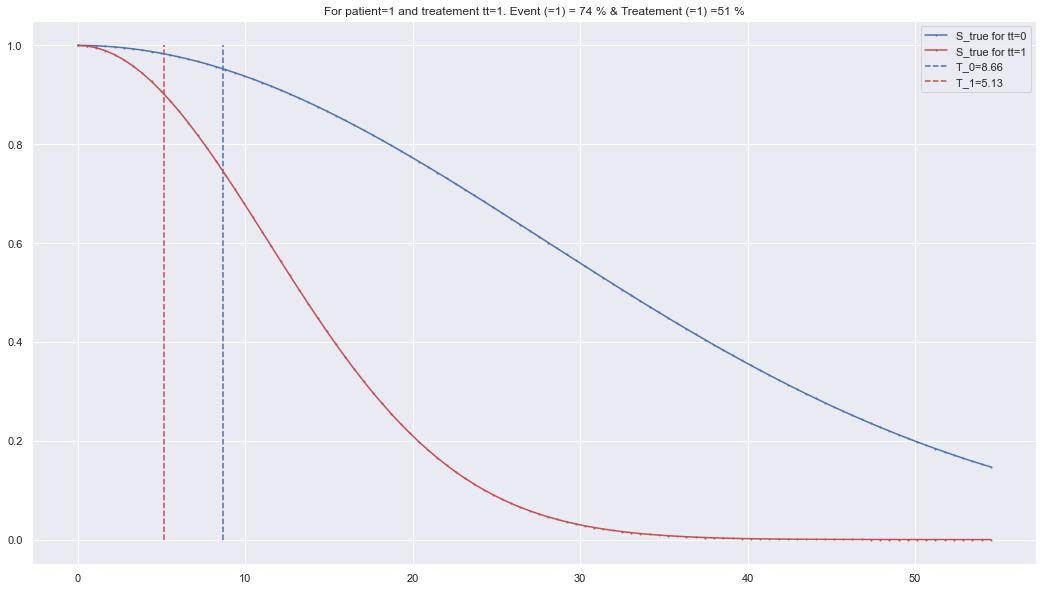

In [12]:
simu.plot_surv_true(patient=1)